In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import wandb
import numpy as np
import pandas as pd



In [2]:

import xgboost as xgb
import multiprocessing

C:\Users\joshu\Anaconda3\envs\dllab\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [434]:
df = pd.read_csv(r"C:\Users\joshu\sciebo\10. Semester\DLLab\football-match-probability-prediction\train.csv", low_memory=False)

In [435]:
display(df.head())
display(df.shape)

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

(110938, 190)

In [436]:
columns = list(df.columns)

f_target, f_home_team_name, f_away_team_name, f_match_date = [[feature] for feature in columns[1:5]]
f_league_name, f_league_id, f_is_cup, f_home_team_coach_id, f_away_team_coach_id = [[feature] for feature in columns[5:10]]

f_home_team_history_match_date = columns[10:20]
f_home_team_history_is_play_home = columns[20:30]
f_home_team_history_is_cup = columns[30:40]
f_home_team_history_goal = columns[40:50]
f_home_team_history_opponent_goal = columns[50:60]
f_home_team_history_rating = columns[60:70]
f_home_team_history_opponent_rating = columns[70:80]
f_home_team_history_coach = columns[80:90]
f_home_team_history_league_id = columns[90:100]
f_away_team_history_match_date = columns[100:110]
f_away_team_history_is_play_home = columns[110:120]
f_away_team_history_is_cup = columns[120:130]
f_away_team_history_goal = columns[130:140]
f_away_team_history_opponent_goal = columns[140:150]
f_away_team_history_rating = columns[150:160]
f_away_team_history_opponent_rating = columns[160:170]
f_away_team_history_coach = columns[170:180]
f_away_team_history_league_id = columns[180:190]

In [453]:
features_to_drop = f_match_date + f_home_team_coach_id + f_away_team_coach_id + f_home_team_history_match_date + f_home_team_history_coach + f_away_team_history_match_date + f_away_team_history_coach
features_boolean = f_is_cup + f_home_team_history_is_play_home + f_home_team_history_is_cup + f_away_team_history_is_play_home + f_away_team_history_is_cup
features_numerical = [f_home_team_history_goal] + [f_home_team_history_opponent_goal] + [f_home_team_history_rating] + [f_home_team_history_opponent_rating] + [f_away_team_history_goal] + [f_away_team_history_opponent_goal] + [f_away_team_history_rating] + [f_away_team_history_opponent_rating]
features_categorical = f_home_team_name + f_away_team_name + f_league_name + f_league_id + f_home_team_history_league_id + f_away_team_history_league_id
flat_features_numerical=[elem for sublist in features_numerical for elem in sublist]

In [31]:
def value_filler(df):
    for i in features_numerical:
        df[i]=df[i].apply(lambda x: x.fillna(df[i].mean(axis=1)))
    return df

In [32]:
#calculates the difference between match date and historical match 3 resp. 10
#in order to get a metric for short resp. longterm fatigue
#missing values get filled with median value
def date_converter(df):
    df['match_date']=pd.to_datetime(df['match_date'],infer_datetime_format=True)
    df['away_team_history_match_date_3']=pd.to_datetime(df['away_team_history_match_date_3'],infer_datetime_format=True)
    df['away_team_history_match_date_10']=pd.to_datetime(df['away_team_history_match_date_10'],infer_datetime_format=True)
    df['home_team_history_match_date_3']=pd.to_datetime(df['home_team_history_match_date_3'],infer_datetime_format=True)
    df['home_team_history_match_date_10']=pd.to_datetime(df['home_team_history_match_date_10'],infer_datetime_format=True)
    df['away_team_fatigue_short']=((df['match_date']-df['away_team_history_match_date_3']).dt.days).fillna(21)
    df['away_team_fatigue_long']=((df['match_date']-df['away_team_history_match_date_10']).dt.days).fillna(21)
    df['home_team_fatigue_short']=((df['match_date']-df['home_team_history_match_date_3']).dt.days).fillna(21)
    df['home_team_fatigue_long']=((df['match_date']-df['home_team_history_match_date_10']).dt.days).fillna(21)
    #drop no longer used columns
    df=df.drop(columns=['match_date']+f_home_team_history_match_date+f_away_team_history_match_date)
    return df

In [33]:
def is_cup_conversion(df):
    '''convert is_cup column from boolean to 0/1'''
    df.is_cup = df.is_cup.apply(lambda x: np.multiply(x, 1) )
    df['is_cup'].fillna(0, inplace=True) # missing value filled with 0, ie non-cup game
    return df

In [34]:
def has_coach_change(df):
    '''add features indicating whether home and away teams have changed coach'''
    #lambda function checks if coach has changed (and only returns true if the change isn't due to a missing value)
    df['home_has_coach_change'] = df.apply(lambda r: any([(r['home_team_coach_id']!=r[f'home_team_history_coach_{i}']) 
                                                    & (np.isnan(r[f'home_team_history_coach_{i}'])==False) for i in range(1,11) ]) , axis=1)
    #transforms booleans into 1/0
    df['home_has_coach_change'] = df['home_has_coach_change'].apply(lambda x: np.multiply(x, 1) )
    #just to be sure we fill values
    df['home_has_coach_change'].fillna(0, inplace=True)
    df['away_has_coach_change'] = df.apply(lambda r: any([(r['away_team_coach_id']!=r[f'away_team_history_coach_{i}']) 
                                                    & (np.isnan(r[f'away_team_history_coach_{i}'])==False) for i in range(1,11) ]) , axis=1)
    df['away_has_coach_change'] = df['away_has_coach_change'].apply(lambda x: np.multiply(x, 1) ).fillna(0, inplace=True)
    df['away_has_coach_change'].fillna(0, inplace=True)
    #drop no longer used columns
    df=df.drop(columns=f_home_team_coach_id + f_away_team_coach_id + f_home_team_history_coach  + f_away_team_history_coach)
    return df

In [35]:
#write function for imputing missing coach values
def fill_coach_id(df):
    df['home_team_coach_id']=df.apply(lambda row: row['home_team_history_coach_1'] if np.isnan(row['home_team_coach_id']) else row['home_team_coach_id'],
                                     axis=1)
    df['away_team_coach_id']=df.apply(lambda row: row['away_team_history_coach_1'] if np.isnan(row['away_team_coach_id']) else row['away_team_coach_id'],
                                     axis=1)
    df['home_team_coach_id'] = df['home_team_coach_id'].fillna(1)
    df['away_team_coach_id'] = df['away_team_coach_id'].fillna(1)
    return df

In [444]:
#print((df['match_date']-df['away_team_history_match_date_3']).describe())

In [29]:

from sklearn.preprocessing import MinMaxScaler
def preprocessing(df):
    df=value_filler(df)
    df=fill_coach_id(df)
    df=has_coach_change(df)
    df=is_cup_conversion(df)
    df=date_converter(df)
    #perhaps include categorical features in the future
    df=df.drop(columns=features_categorical)
    df = df.dropna()
    df = df.drop_duplicates()
    df[flat_features_numerical]=df[flat_features_numerical].astype(float)
    df[features_boolean]=df[features_boolean].astype(float)
    #scaling
    scaler=MinMaxScaler()
    df[flat_features_numerical+list(df.columns[-4:])]=scaler.fit_transform(df[flat_features_numerical+list(df.columns[-4:])])
    return df
    

In [489]:
data=preprocessing(df)

In [485]:
list(data.columns[-4:])+flat_features_numerical

['away_team_fatigue_short',
 'away_team_fatigue_long',
 'home_team_fatigue_short',
 'home_team_fatigue_long',
 'home_team_history_goal_1',
 'home_team_history_goal_2',
 'home_team_history_goal_3',
 'home_team_history_goal_4',
 'home_team_history_goal_5',
 'home_team_history_goal_6',
 'home_team_history_goal_7',
 'home_team_history_goal_8',
 'home_team_history_goal_9',
 'home_team_history_goal_10',
 'home_team_history_opponent_goal_1',
 'home_team_history_opponent_goal_2',
 'home_team_history_opponent_goal_3',
 'home_team_history_opponent_goal_4',
 'home_team_history_opponent_goal_5',
 'home_team_history_opponent_goal_6',
 'home_team_history_opponent_goal_7',
 'home_team_history_opponent_goal_8',
 'home_team_history_opponent_goal_9',
 'home_team_history_opponent_goal_10',
 'home_team_history_rating_1',
 'home_team_history_rating_2',
 'home_team_history_rating_3',
 'home_team_history_rating_4',
 'home_team_history_rating_5',
 'home_team_history_rating_6',
 'home_team_history_rating_7',
 

In [ ]:


# data processing 
#data_set = data[['id']]
#data_set = data_set.join((df['target']))
#data_set = data_set.join(df[features_boolean].astype(float))
#data_set = data_set.join(df[flat_features_numerical].astype(float))
#data_set.shape


In [490]:
data.head()

,id,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_opponent_goal_1,away_team_history_opponent_goal_2,away_team_history_opponent_goal_3,away_team_history_opponent_goal_4,away_team_history_opponent_goal_5,away_team_history_opponent_goal_6,away_team_history_opponent_goal_7,away_team_history_opponent_goal_8,away_team_history_opponent_goal_9,away_team_history_opponent_goal_10,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,home_has_coach_change,away_has_coach_change,away_team_fatigue_short,away_team_fatigue_long,home_team_fatigue_short,home_team_fatigue_long
0,11906497,away,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.000000,0.166667,0.000000,0.066667,0.111111,0.047619,0.222222,0.

In [491]:
data.columns[2:]

Index(['is_cup', 'home_team_history_is_play_home_1',
       'home_team_history_is_play_home_2', 'home_team_history_is_play_home_3',
       'home_team_history_is_play_home_4', 'home_team_history_is_play_home_5',
       'home_team_history_is_play_home_6', 'home_team_history_is_play_home_7',
       'home_team_history_is_play_home_8', 'home_team_history_is_play_home_9',
       ...
       'away_team_history_opponent_rating_7',
       'away_team_history_opponent_rating_8',
       'away_team_history_opponent_rating_9',
       'away_team_history_opponent_rating_10', 'home_has_coach_change',
       'away_has_coach_change', 'away_team_fatigue_short',
       'away_team_fatigue_long', 'home_team_fatigue_short',
       'home_team_fatigue_long'],
      dtype='object', length=127)

In [494]:
y = data.columns[1]
x = data.columns[2:]
print(y,x)


target Index(['is_cup', 'home_team_history_is_play_home_1',
       'home_team_history_is_play_home_2', 'home_team_history_is_play_home_3',
       'home_team_history_is_play_home_4', 'home_team_history_is_play_home_5',
       'home_team_history_is_play_home_6', 'home_team_history_is_play_home_7',
       'home_team_history_is_play_home_8', 'home_team_history_is_play_home_9',
       ...
       'away_team_history_opponent_rating_7',
       'away_team_history_opponent_rating_8',
       'away_team_history_opponent_rating_9',
       'away_team_history_opponent_rating_10', 'home_has_coach_change',
       'away_has_coach_change', 'away_team_fatigue_short',
       'away_team_fatigue_long', 'home_team_fatigue_short',
       'home_team_fatigue_long'],
      dtype='object', length=127)


In [495]:
#Y=data_set[y]
#print(Y)

0         away
1         home
2         draw
3         away
4         home
          ... 
110933    draw
110934    away
110935    draw
110936    away
110937    home
Name: target, Length: 90427, dtype: object


In [498]:
X=data[x]

In [500]:
data.to_csv('preprocessed.csv',index=False)

In [4]:
preprocessed=pd.read_csv('preprocessed.csv')
preprocessed.shape

(90428, 129)

In [8]:
preprocessed.head()

,id,target,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_opponent_goal_1,away_team_history_opponent_goal_2,away_team_history_opponent_goal_3,away_team_history_opponent_goal_4,away_team_history_opponent_goal_5,away_team_history_opponent_goal_6,away_team_history_opponent_goal_7,away_team_history_opponent_goal_8,away_team_history_opponent_goal_9,away_team_history_opponent_goal_10,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,home_has_coach_change,away_has_coach_change,away_team_fatigue_short,away_team_fatigue_long,home_team_fatigue_short,home_team_fatigue_long
0,11428294,away,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.055556,0.055556,0.047619,0.111111,0.047619,0.000000,0.000000,0.000000,0.000000,0.

In [9]:
preprocessed.columns[1]

'target'

In [10]:
y = preprocessed.columns[1]
x = preprocessed.columns[2:]
print(y,x)


target Index(['is_cup', 'home_team_history_is_play_home_1',
       'home_team_history_is_play_home_2', 'home_team_history_is_play_home_3',
       'home_team_history_is_play_home_4', 'home_team_history_is_play_home_5',
       'home_team_history_is_play_home_6', 'home_team_history_is_play_home_7',
       'home_team_history_is_play_home_8', 'home_team_history_is_play_home_9',
       ...
       'away_team_history_opponent_rating_7',
       'away_team_history_opponent_rating_8',
       'away_team_history_opponent_rating_9',
       'away_team_history_opponent_rating_10', 'home_has_coach_change',
       'away_has_coach_change', 'away_team_fatigue_short',
       'away_team_fatigue_long', 'home_team_fatigue_short',
       'home_team_fatigue_long'],
      dtype='object', length=127)


In [11]:
Y=preprocessed[y]
print(Y)

0        away
1        away
2        draw
3        away
4        away
         ... 
90423    draw
90424    away
90425    draw
90426    away
90427    away
Name: target, Length: 90428, dtype: object


In [12]:
X=preprocessed[x]

In [13]:
#imports for train function
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb


In [14]:
#label encoding
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [15]:

X_train, X_valid, y_train, y_valid = train_test_split(X, label_encoded_y, train_size=0.8, random_state=42)

In [34]:
y_valid_inverse=label_encoder.inverse_transform(y_valid)
print((y_valid_inverse))
pd.DataFrame(y_valid_inverse).describe()




['draw' 'home' 'draw' ... 'draw' 'draw' 'draw']


,0
count,18086
unique,3
top,home
freq,7841


In [ ]:
unique, counts=np.unique(y_valid_inverse, return_counts=True)
freq=counts/18086
print(dict(zip(unique, freq)))

In [35]:
y_valid

array([1, 2, 1, ..., 1, 1, 1])

In [33]:
def train_prediction(config: dict):
    d_train = xgb.DMatrix(X_train, y_train)
    d_test = xgb.DMatrix(X_valid, y_valid)
    results = {}
    xgb.train(
         config,
         d_train,
         evals=[(d_test, "eval")],
         evals_result=results,
         verbose_eval=False)
    mlogloss=results['eval']['mlogloss'][-1]
    tune.report(logloss=mlogloss, done=True)
    
    

In [17]:
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_valid, y_valid)

C:\Users\joshu\Anaconda3\envs\dllab\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [35]:
config = {
    'booster': 'gbtree',
    'max_depth': 7, 
    'learning_rate': 0.028330,
    'min_split_loss': 0.01,
    'min_child_weight': 1,
    'subsample': 0.716388813368673,
    'colsample_bytree': 1,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
    }

num_round = 1000

evallist = [(d_train, 'train'), (d_test, 'eval')]

In [18]:
model=xgb.Booster()
model.load_model('final_model')

In [19]:
model.feature_names

In [36]:
wandb.login()

wandb: Currently logged in as: antonimm. Use `wandb login --relogin` to force relogin


True

In [37]:
from wandb.xgboost import wandb_callback


In [38]:
results={}
wandb.init(project='DLL-Project', name='promising_try',config=config)
bst = xgb.train(config, d_train, num_round, evallist, evals_result=results, early_stopping_rounds=100)

[0]	train-mlogloss:1.09519	eval-mlogloss:1.09593
[1]	train-mlogloss:1.09190	eval-mlogloss:1.09336
[2]	train-mlogloss:1.08869	eval-mlogloss:1.09096
[3]	train-mlogloss:1.08559	eval-mlogloss:1.08856
[4]	train-mlogloss:1.08255	eval-mlogloss:1.08627
[5]	train-mlogloss:1.07956	eval-mlogloss:1.08405
[6]	train-mlogloss:1.07666	eval-mlogloss:1.08193
[7]	train-mlogloss:1.07384	eval-mlogloss:1.07989
[8]	train-mlogloss:1.07111	eval-mlogloss:1.07789
[9]	train-mlogloss:1.06850	eval-mlogloss:1.07602
[10]	train-mlogloss:1.06587	eval-mlogloss:1.07416
[11]	train-mlogloss:1.06336	eval-mlogloss:1.07239
[12]	train-mlogloss:1.06092	eval-mlogloss:1.07068
[13]	train-mlogloss:1.05855	eval-mlogloss:1.06903
[14]	train-mlogloss:1.05625	eval-mlogloss:1.06747
[15]	train-mlogloss:1.05401	eval-mlogloss:1.06593
[16]	train-mlogloss:1.05185	eval-mlogloss:1.06450
[17]	train-mlogloss:1.04973	eval-mlogloss:1.06306
[18]	train-mlogloss:1.04760	eval-mlogloss:1.06173
[19]	train-mlogloss:1.04559	eval-mlogloss:1.06049
[20]	train

KeyboardInterrupt: 

In [26]:
print(results['eval']['mlogloss'][400])

1.01765


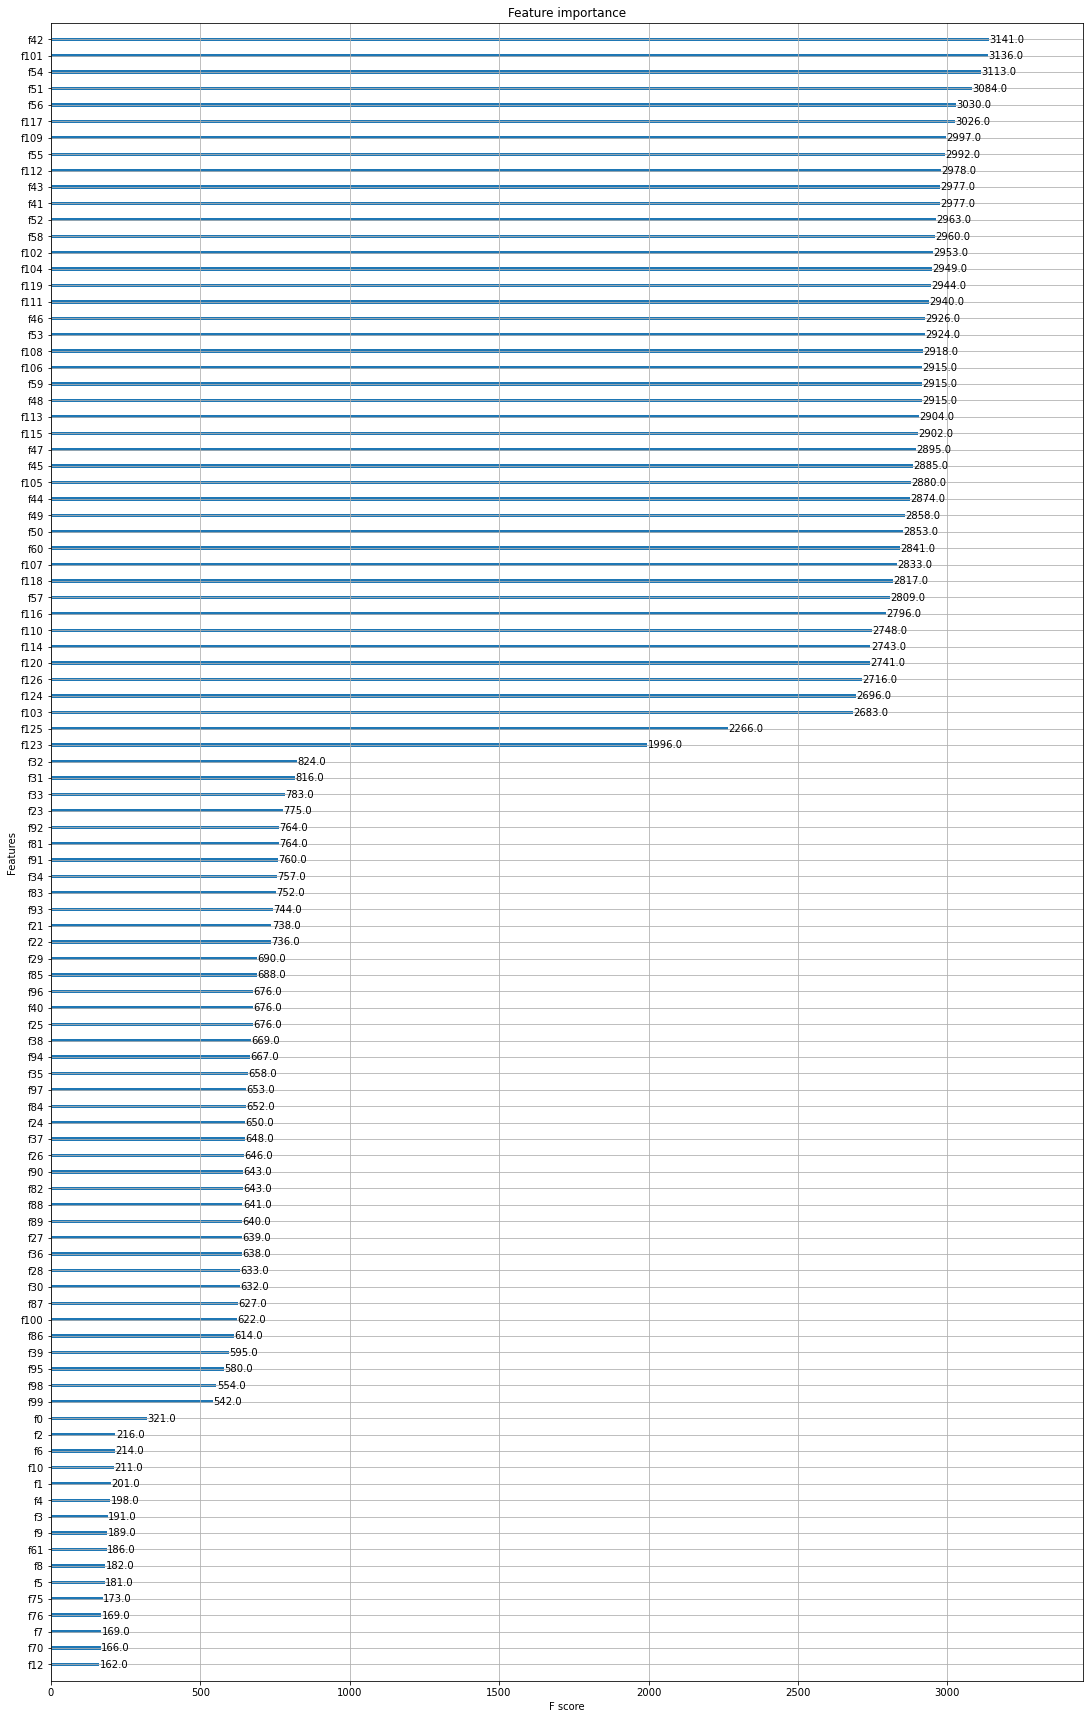

In [20]:
xgb.plot_importance(model, max_num_features=100)
fig = plt.gcf()
fig.set_size_inches(18.5, 30.5)

In [21]:
print(model.feature_names)

None


In [27]:
dftest = pd.read_csv(r"C:\Users\joshu\sciebo\10. Semester\DLLab\football-match-probability-prediction\test.csv", low_memory=False)


In [52]:
dftest.shape

(72711, 191)

In [44]:
dftest.head()

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_opponen

In [38]:
columns = list(dftest.columns)

f_home_team_name, f_away_team_name, f_match_date = [[feature] for feature in columns[1:4]]
f_league_name, f_league_id, f_is_cup, f_home_team_coach_id, f_away_team_coach_id = [[feature] for feature in columns[4:9]]

f_home_team_history_match_date = columns[9:19]
f_home_team_history_is_play_home = columns[19:29]
f_home_team_history_is_cup = columns[29:39]
f_home_team_history_goal = columns[39:49]
f_home_team_history_opponent_goal = columns[49:59]
f_home_team_history_rating = columns[59:69]
f_home_team_history_opponent_rating = columns[69:79]
f_home_team_history_coach = columns[79:89]
f_home_team_history_league_id = columns[89:99]
f_away_team_history_match_date = columns[99:109]
f_away_team_history_is_play_home = columns[109:119]
f_away_team_history_is_cup = columns[119:129]
f_away_team_history_goal = columns[129:139]
f_away_team_history_opponent_goal = columns[139:149]
f_away_team_history_rating = columns[149:159]
f_away_team_history_opponent_rating = columns[159:169]
f_away_team_history_coach = columns[169:179]
f_away_team_history_league_id = columns[179:189]




In [39]:
features_to_drop = f_match_date + f_home_team_coach_id + f_away_team_coach_id + f_home_team_history_match_date + f_home_team_history_coach + f_away_team_history_match_date + f_away_team_history_coach
features_boolean = f_is_cup + f_home_team_history_is_play_home + f_home_team_history_is_cup + f_away_team_history_is_play_home + f_away_team_history_is_cup
features_numerical = [f_home_team_history_goal] + [f_home_team_history_opponent_goal] + [f_home_team_history_rating] + [f_home_team_history_opponent_rating] + [f_away_team_history_goal] + [f_away_team_history_opponent_goal] + [f_away_team_history_rating] + [f_away_team_history_opponent_rating]
features_categorical = f_home_team_name + f_away_team_name + f_league_name + f_league_id + f_home_team_history_league_id + f_away_team_history_league_id
flat_features_numerical=[elem for sublist in features_numerical for elem in sublist]

In [54]:
from sklearn.preprocessing import MinMaxScaler
def test_preprocessing(df):
    df=value_filler(df)
    df=fill_coach_id(df)
    df=has_coach_change(df)
    df=is_cup_conversion(df)
    df=date_converter(df)
    #perhaps include categorical features in the future
    df=df.drop(columns=features_categorical)
    df[flat_features_numerical]=df[flat_features_numerical].astype(float)
    df[features_boolean]=df[features_boolean].astype(float)
    #scaling
    scaler=MinMaxScaler()
    df[flat_features_numerical+list(df.columns[-4:])]=scaler.fit_transform(df[flat_features_numerical+list(df.columns[-4:])])
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

In [55]:
data_settest=test_preprocessing(dftest)

In [56]:
data_settest.head()

,id,is_cup,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_opponent_goal_1,away_team_history_opponent_goal_2,away_team_history_opponent_goal_3,away_team_history_opponent_goal_4,away_team_history_opponent_goal_5,away_team_history_opponent_goal_6,away_team_history_opponent_goal_7,away_team_history_opponent_goal_8,away_team_history_opponent_goal_9,away_team_history_opponent_goal_10,away_team_history_rating_1,away_team_history_rating_2,away_team_history_rating_3,away_team_history_rating_4,away_team_history_rating_5,away_team_history_rating_6,away_team_history_rating_7,away_team_history_rating_8,away_team_history_rating_9,away_team_history_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10,home_has_coach_change,away_has_coach_change,away_team_fatigue_short,away_team_fatigue_long,home_team_fatigue_short,home_team_fatigue_long
0,17761448,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.2,0.071429,0.0625,0.133333,0.000000,0.117647,0.071429,0.000000,0.000000,0.000000,0.000000,0.0

In [57]:
data_settest.shape

(72711, 128)

In [58]:
X_test=data_settest.drop('id', axis=1)
X_test_d = xgb.DMatrix(X_test)

C:\Users\joshu\Anaconda3\envs\dllab\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [59]:
predictions = bst.predict(X_test_d, iteration_range=(0, bst.best_iteration))

In [22]:
final_predictions = model.predict(d_test, iteration_range=(0, model.best_iteration))

In [23]:
final_predictions

array([[0.2535434 , 0.29787162, 0.44858497],
       [0.27785245, 0.15584041, 0.5663071 ],
       [0.43656746, 0.2886814 , 0.27475113],
       ...,
       [0.3845862 , 0.23235837, 0.38305548],
       [0.30506134, 0.27211514, 0.42282355],
       [0.19587539, 0.18902373, 0.61510086]], dtype=float32)

In [29]:
classification=[np.argmax(pred) for pred in final_predictions]
print(classification)

[2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 

In [30]:
len(classification)

18086

In [36]:
confusion = np.zeros((3,3), dtype=np.int32)
for i in range(len(classification)):
    confusion[y_valid[i],classification[i]] +=1
total = np.sum(confusion)
accuracy = np.sum(np.diag(confusion)) / total
per_class_accuracy = np.diag(confusion) / np.sum(confusion, axis=1)
print(total,accuracy,per_class_accuracy,confusion)


18086 0.48728298131151165 [0.4445815  0.02100656 0.78995026] [[2523   89 3063]
 [1334   96 3140]
 [1562   85 6194]]


In [37]:
print(confusion/total)

[[0.13950017 0.00492093 0.16935751]
 [0.07375871 0.00530797 0.17361495]
 [0.08636514 0.00469977 0.34247484]]


In [41]:
conf_matrix=pd.DataFrame(confusion/total ,columns=label_encoder.inverse_transform([0,1,2]), index=label_encoder.inverse_transform([0,1,2]))
cols=['away','draw','home']
conf_matrix=conf_matrix[cols]
display(conf_matrix)

,away,draw,home
away,0.139500,0.004921,0.169358
draw,0.073759,0.005308,0.173615
home,0.086365,0.004700,0.342475


In [43]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_valid,classification,normalize='all')

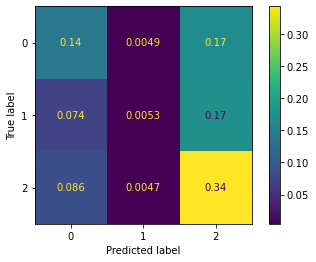

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(conf)
disp.plot()

In [45]:
submission = pd.DataFrame(final_predictions ,columns=label_encoder.inverse_transform([0,1,2]))

cols=['home','away','draw']
submission=submission[cols]
display(submission.describe())

,home,away,draw
count,18086.000000,18086.000000,18086.000000
mean,0.433176,0.312050,0.254772
std,0.144785,0.131023,0.056480
min,0.043495,0.030670,0.033539
25%,0.333251,0.221670,0.220293
50%,0.423191,0.293951,0.262109
75%,0.523314,0.383520,0.294960
max,0.929100,0.884099,0.452670


In [62]:
submission.to_csv('submission.csv', index=False)

In [63]:
submission.shape

(72711, 4)